In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.available
plt.style.use("seaborn-v0_8-whitegrid")

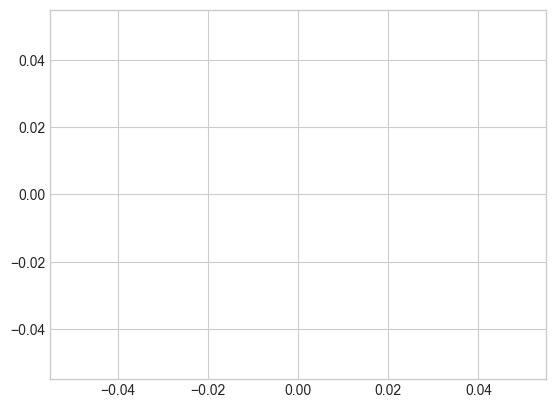

In [4]:
plt.plot();

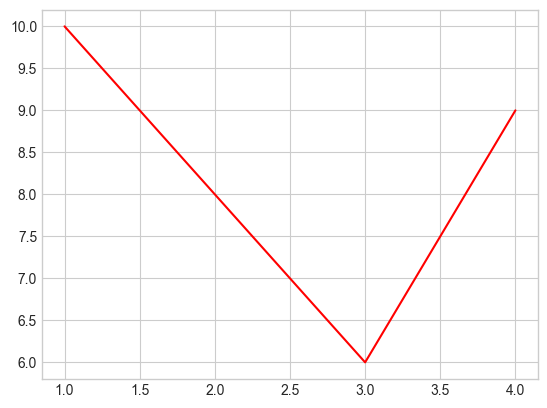

In [5]:
x = [1,2,3,4]
y = [10,8,6,9]
plt.plot(x,y, color="red");

### Pyplot API vs Object-Oriented API
* Pyplot API -> Quickly
* OO API -> Advanced

#### Pyplot API

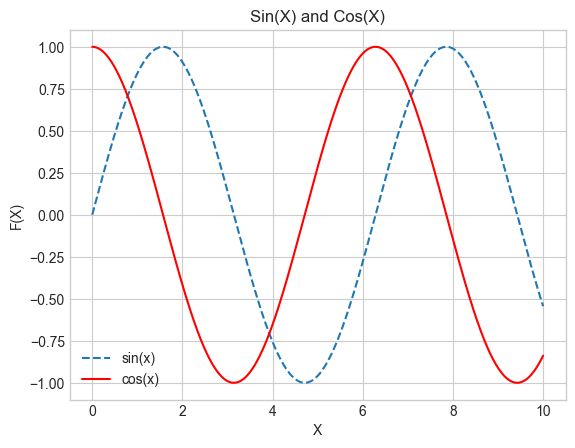

In [20]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x), linestyle="dashed",label="sin(x)");
plt.plot(x,np.cos(x), color="red", label="cos(x)")

plt.title("Sin(X) and Cos(X)")
plt.xlabel("X")
plt.ylabel("F(X)")
# plt.xlim([0,4])
# plt.ylim([-0.75,0.75])

# Similar with xlim and ylim
# plt.axis([xmin,xmax,ymin,ymax])
 
# plt.axis("equal")
plt.axis("tight")
plt.legend();

#### Object-Oriented API

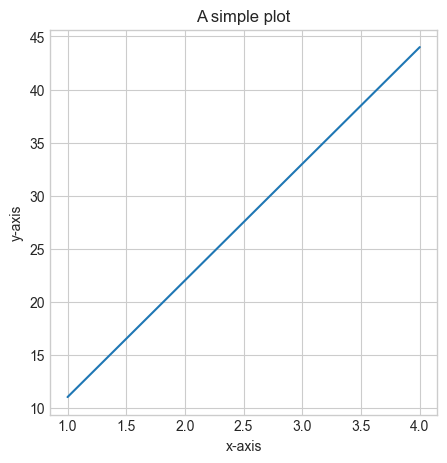

In [24]:
#1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

#2. Setup plot
fig, ax = plt.subplots(figsize=(5,5)) # Figure size  = Width & Height of the plot

#3. Plot the data
ax.plot(x,y);
ax.set(title="A simple plot",
       xlabel="x-axis",
       ylabel="y-axis");

## Most common types of Matplotlib plots
* line
* scatter
* bar
* hist
* subplots()

### Line

In [25]:
# Create an array
x = np.linspace(0,10,100)
x[:5]

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

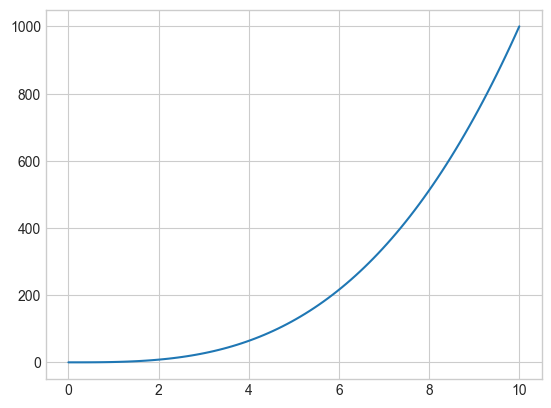

In [26]:
## OO API plot a line chart
fig, ax = plt.subplots()
ax.plot(x,x**3)

### Scatter

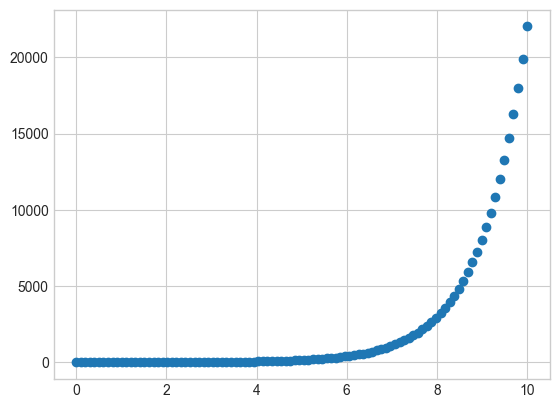

In [27]:
# Pyplot API
plt.scatter(x,np.exp(x)); # y=e^(x)

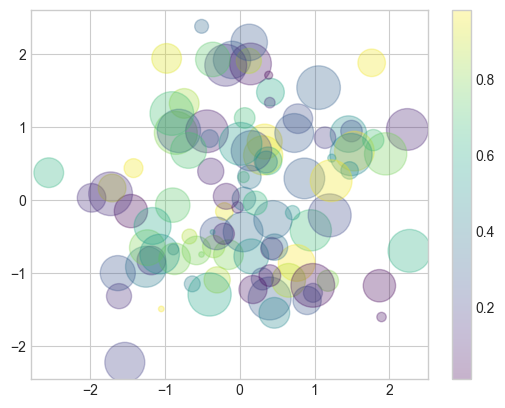

In [ ]:
# OO API
# Prepare New Data
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000*rng.rand(100)
fig, ax = plt.subplots()
img1 = ax.scatter(x,y, s=sizes, c=colors, cmap='viridis', alpha=0.3)

fig.colorbar(img1)

### Bar 
* Vertical
* Horizontal

[Text(0.5, 1.0, 'Bach Hoa Xanh'), Text(0, 0.5, 'Price ($)')]

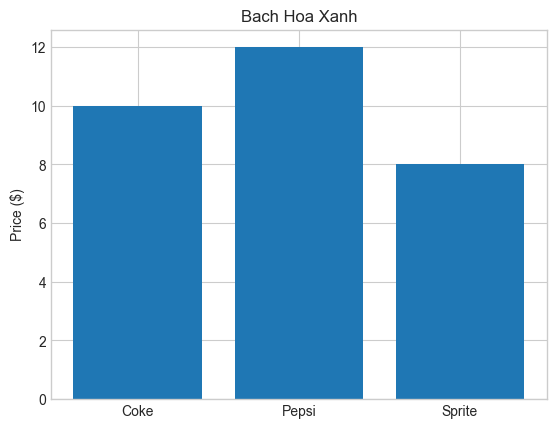

In [40]:
# Prepare Data from a python dictionary
soft_drink_prices = {"Coke": 10,
                     "Pepsi": 12,
                     "Sprite": 8}
fig, ax = plt.subplots()
ax.bar(soft_drink_prices.keys(),soft_drink_prices.values())
ax.set(title="Bach Hoa Xanh",ylabel="Price ($)")

<BarContainer object of 3 artists>

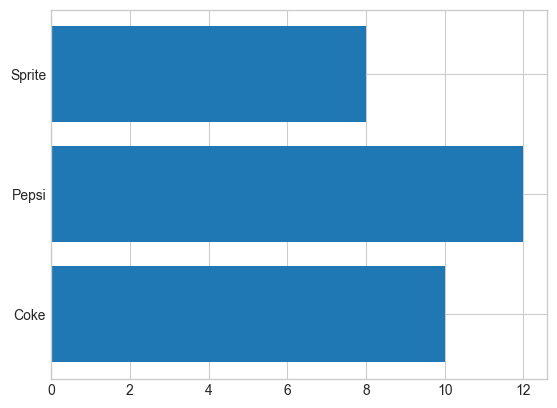

In [41]:
fig, ax = plt.subplots()
ax.barh(list(soft_drink_prices.keys()),list(soft_drink_prices.values()))

### Histogram

In [46]:
# Prepare data
np.random.seed(42)
student_height = np.random.normal(170,10,250)

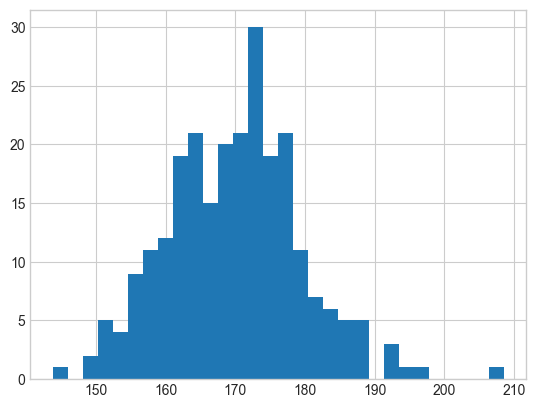

In [49]:
# Pyplot API
plt.hist(student_height, bins=30);

### Subplots

#### Option 1

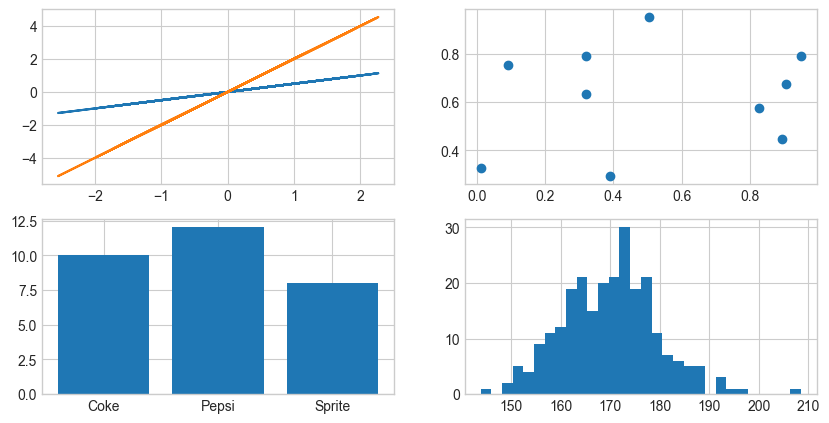

In [58]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))

# Plot data to each axis
ax1.plot(x,x/2);
ax1.plot(x,x*2);

ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(soft_drink_prices.keys(),soft_drink_prices.values());
ax4.hist(student_height,bins=30);

#### Option 2

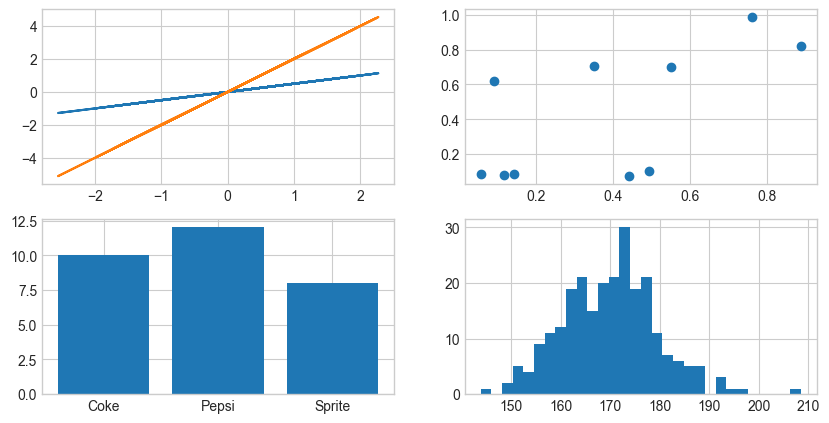

In [59]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,5))

# Plot data to each axis

ax[0,0].plot(x,x/2);
ax[0,0].plot(x,x*2);

ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(soft_drink_prices.keys(),soft_drink_prices.values());
ax[1,1].hist(student_height,bins=30);

## Project: Data Visualization - California Cities 

In [61]:
cities = pd.read_csv("../data/california_cities.csv")
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


Text(0.5, 1.0, 'California Cities: Population and Area Distribution')

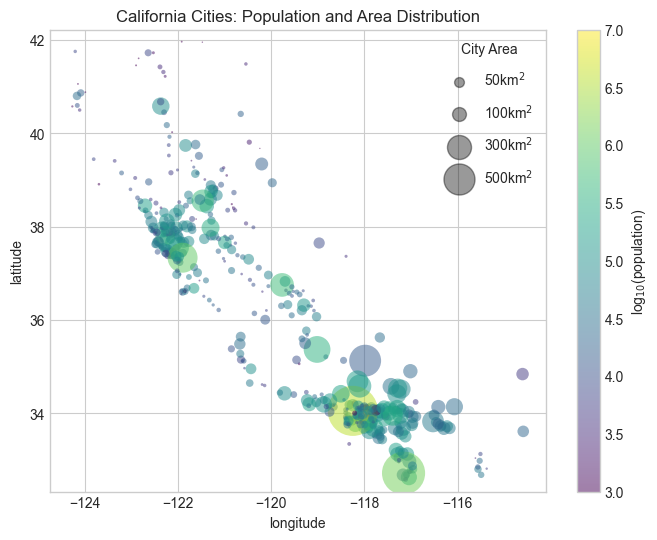

In [88]:
# Extract Latd and Longd
lat, long = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6))
# Plot using Pyplot API
plt.scatter(long,lat,
            c=np.log10(population),cmap='viridis', s=area,
            linewidths=0,alpha=0.5);
plt.axis('equal');
plt.xlabel('longitude')
plt.ylabel('latitude');
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7) # limit for color bar


# Create a legend for cities' sizes
area_range = [50,100,300,500]
for area in area_range:
  plt.scatter([],[],s=area, c='k', alpha=0.4,
              label=str(area) + 'km$^2$')
plt.legend(labelspacing=1,title="City Area");
plt.title('California Cities: Population and Area Distribution')